
<h1 align="center"> CSE 142 Assignment 2, Winter 2024



<h2 align="center"> 3 Questions, 100 pts, due: 23:59 pm, Feb 5th, 2024
    
    Your name: Richard Hsieh          Student ID: 1839728

## Instruction 

- Submit your assignments onto **Gradescope** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file.

    (2) Also save your file into a pdf version, if error appears, save an html version instead (easy to grade for written questions).
    
    (3) All other materials to make your <code>.ipynb</code> file runnable.
    
    **For assignment related questions, please reach TA or grader through Canvas/Piazza/Email.**
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 
- Most coding parts can be finished with only 1-2 lines of codes.
- Make sure you have installed required packages: <code>scikit-learn</code>.
- Double click to edit each markdown cell.

## Objective 

- **Task 1:** Maximum likelihood estimation (math)
- **Task 2:** Linear Regression (with Scikit-learn)
- **Task 3:** Principle Component Analysis (with Scikit-learn)

# Question 1 (Maximum likelihood estimation and Posterior, 20 pts) 

Assume we have a coin that has some unknown probability $h$ of coming up heads (and probability $1-h$ of coming up tails). If the coin is flipped five times getting three heads and two tails ($\mathbf{HHHTT}$) then:

(a -- 10pts) What is the maximum likelihood estimate for $h$?

(b -- 10pts) Assume that (before flipping the coin) we have a prior density $p(h)$ for the various values of $h\in [0,1]$. Give the formula for the posterior probability density $p(h \mid \mathbf{HHHTT})$ as a function of the prior $p(h)$.

For Question 1(b), the solution is acceptable if the formula contains an integral.

**Solution (a)**:

$$\begin{aligned}

P(H) &= h\\
P(T) &= 1-h\\

P(HHHTT) &= P(H) \cdot P(H) \cdot P(H) \cdot P(T) \cdot P(T)\\
&= h \cdot h \cdot h  (1-h) (1-h)\\
&= h^3 (1-h)^2\\
&= h^3 (1-2h+h^2)\\
&= h^3 - 2h^4 + h^5\\

\frac{d}{dh} P(HHHTT) &= 5h^4 - 8h^3 + 3h^2 \\
\text{set derivative to 0} &\rightarrow 5h^4 - 8h^3 + 3h^2 = 0 \\
&= 5h^2 - 8h +3 = 0 \\
\text{Using quadratic formula, } \frac{8 \pm \sqrt{64-4(5)(3)}}{10} &= \frac{3}{5}, 1 \\
\text{Answer is: } \frac{3}{5}

\end{aligned}$$

**Solution (b)**:


**If you are not familair with Latex, you may attach a figure/screen-shoot and display the code below.**

In [1]:
from IPython.display import Image
# Replace the figure name
# Image(filename='sample.png') 

# Question 2 (Linear Regression, 40 pts)
In this question, you will be using **Scikit-learn** to empirically apply the Linear Regression model. We will adopt an advertisement dataset **Advertising.csv** from Kaggle. 

### Reading data using Pandas

In [2]:
# Read the dataset you will be working on
# The dataframe loaded with pandas is named as data

import pandas as pd
data = pd.read_csv('Advertising.csv', index_col=0)  # Modify your data path accordingly.

# Take a look at the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

### Features and responses

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- There are 200 **observations**, and each observation (each row) is a single market.
- **Your main task**: predict the sales of a single product in a given market.
- Since the response variable is continuous, this is a **regression** problem.

### Linear regression

**Pros:** fast, no tuning required, highly interpretable

**Cons:** adopting the linear regression is unlikely to always generate the best predictive accuracy, since Linear Regression presumes a linear relationship between the features and response. This assumption may not always make sense. (But if one can _transform_ the features so that do have a linear relationship, sometimes progress can be made, for example by taking logs.)

**Expression:**

- $y$: the response
- $\beta_0$: the intercept
- $\beta_1$: the coefficient for $x_1$ (the first feature)
- $\beta_i$ is the coefficient for $x_i$ (the ith feature, $i\in \{1, 2, ..., n\}$)

For this regression task:

$\text{Sales} = \beta_0 + \beta_1 \times \text{TV} + \beta_2 \times \text{Radio} + \beta_3 \times \text{Newspaper}$

The $\beta$ values ($\beta=[\beta_0, \beta_1, \beta_2, \beta_3]$) are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, we can make use of the fitted model to make predictions!

### Prepare the dataset for training use

- Scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- Pandas is built on top of NumPy, and exposes numpy methods. Thus, X can be a pandas DataFrame, y can be a pandas Series!

In [4]:
# Prepare the feature X
X = data[['TV', 'Radio', 'Newspaper']]

# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [5]:
# Prepare the response Y
y = data['Sales']
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Question 2.1 (Split the dataset into train and test parts, 5 pts)

For features $X$ and response $y$, use **sklearn** to perform the the splitting of dataset: $80\%$ for train data, $20\%$ for the test data.

In [6]:
################# Your answer for Question 2.1   #################
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

################# Your code above #################

Double check the shape of train and test data:

In [7]:
# default split is 80% for training and 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


## Question 2.2 (Train a Linear regression model via Scikit-learn, 10 pts)

Assume you model is named as **model**, and you train the linear regression model to fit on the training data.

In [31]:
################# Your answer for Question 2.2   #################
# Name your linear regression model as 'model', so proceeding cells won't run into errors.

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

################# Your code above #################

LinearRegression()

In [9]:
# Take a look at your model coefficients
import numpy as np
print(np.round(model.intercept_, 4))
print([np.round(val, 4) for val in model.coef_])

2.9988
[0.0449, 0.1956, -0.005]


In [10]:
# Match the feature names with the trained coefficients
list(zip(data.columns[:3].tolist(), model.coef_))

[('TV', 0.044894009940098824),
 ('Radio', 0.19555996894565858),
 ('Newspaper', -0.00496121092927423)]

## Question 2.3 (Interpreting model coefficients, 10 pts)

The coefficients of each feature are printed above. 

### Your tasks:

- What is the trained linear regression model? 

- **(replace $\beta_i$ below with the trained coefficients, reserve four decimal places, 5 pts)**

$$\text{Sales} = \beta_0 + \beta_1 \times \text{TV} + \beta_2 \times \text{Radio} + \beta_3 \times \text{Newspaper}$$

- **(Open) question (5 pts)**: how do you interpret the coefficient of **TV** ($\beta_1$)?

### Your solution for Question 2.3: 
The coefficient for **TV** $\beta_1$ is around 0.0448 which is less than Radio and more than Newspaper. Since this equation represents the Sales, I interpret $\beta_1$ as a coefficient which shows that TV makes more money than Newspaper, but less than Radio.

### Making predictions

In [29]:
# make predictions on the testing set
y_pred = model.predict(X_test)
# Print the test accuracy score from your trained linear regression model
model.score(X_test,y_test)

0.9230185102176724

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.  (Since predictions would hardly ever exactly match the measured quantities.)

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is a popular evaluation metric for regression, which is defined as the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

## Question 2.4 (Evaluate your predictions on test features with RMSE metric, 5 pts)

Hint: you may calculate MSE using scikit-learn, but RMSE is a little bit different from MSE.

In [28]:
from sklearn import metrics
################# Your answer for Question 2.4   #################
print(len(y_train), len(y_pred))
# metrics.mean_squared_error(y_test, y_pred, squared=False)
metrics.root_mean_squared_error(y_test, y_pred)
################# Your code above #################

160 40


1.5523969628389764

## Question 2.5 (Does the feature 'Newspaper' help? 10 pts)

Does the feature **Newspaper** contribute or impair the model prediction? Now repeat previous procedure: 

- For features $X$, only select **TV** and **Radio**; response $y$ is unchanged.

- Split the dataset as what you have done before.

- Fit/Train the model on the train data.

- Make predictions on the test data.

- Compute the RMSE of the predictions on the test data.

- **Show your observations!**

**Reminder:** if you use <code>random_state</code> while splitting the dataset, make sure the value of <code>random_state</code> is the same for the two splits. So that the test data only differs in the column of **Newspaper**.

In [13]:
################# Your answer for Question 2.5   #################

X = data[['TV', 'Radio']]
y = data['Sales']

# print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(model.score(X_test, y_test))

print(metrics.root_mean_squared_error(y_test, y_pred))


################# Your code above #################

0.9230185102176724
1.5523969628389764


### Your observations:


# Question 3 (PCA, 40 pts)

In this question, we will explore how PCA helps with reducing the dimensionality through scikit-learn. We will adopt a simple digits dataset contained in scikit-learn.

In [14]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

In [15]:
from sklearn.datasets import load_digits
data_digit = load_digits()
data_digit.data.shape

(1797, 64)

As you have seen above, there are 1797 rows and 64 columns in this dataset. Each row denotes the pixel values of an image. Since each image is 8*8 (in pixel), the dimension of each feature is 64. Let's take a look at a few images contained in this dataset.

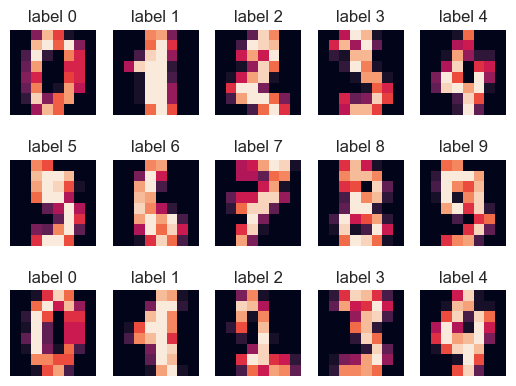

In [16]:
# A help function to display images with labels
def display_digits(imgs):
    h = 3
    w = 5
    fig, axes = plt.subplots(h, w)
    for i in range(h):
        for j in range(w):
            if imgs.shape[1] == 64:
                axes[i, j].imshow(imgs[i * w + j].reshape(8, 8))
            else:
                axes[i, j].imshow(imgs[i * w + j])
            axes[i, j].axis('off')
            axes[i, j].set_title(f'label {data_digit.target[i * w + j]}')
# Take a look at a few examples
display_digits(data_digit.images)

**PCA** finds uncorrelated orthogonal axes (principal components) in a high dimensional space (i.e., 64) to project the feature onto principal components.

## Question 3.1 (PCA and dimensionality deduction with Scikit-learn, 10 pts)

In this question, you may use the implementation of PCA from scikit-learn, as imported below. Detailed explanations of parameters settings are available in this [link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

### Your task in this question:

Fit the model with feature X (**data_digit.data** for this dataset) and apply the dimensionality reduction on X, keep 2 components.

In [17]:
from sklearn.decomposition import PCA

################# Your answer for Question 3.1   #################

# name the transformed (dimension reduced) feature as projected
pca = PCA(n_components=2)
projected = pca.fit_transform(data_digit.data)
################# Complete the code above #################


# The code below checks whether the feature dimension 64 is reduced to 2.
print(data_digit.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


With the reduced dimension of features, we can now visualize the projected/reduced features in a 2-dimension plot as below. There are hardly any overlaps between digit 0 and any other digits. While in the central area of the figure, features are not well separable.

/var/folders/vb/sntjxmd170bch_11d6hdj9400000gn/T/ipykernel_16759/284023998.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Paired', 10))


<Figure size 1800x800 with 0 Axes>

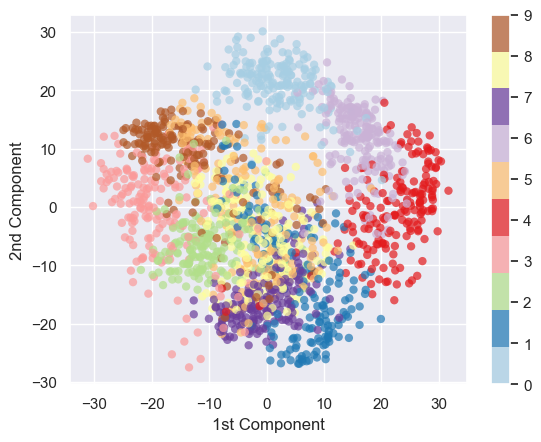

<Figure size 1800x800 with 0 Axes>

In [18]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=data_digit.target, edgecolor='none', alpha=0.7,
            cmap=plt.cm.get_cmap('Paired', 10))
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.colorbar()
plt.figure(figsize=(18, 8))

## Question 3.2 (How many components do we need? 15 pts)

In practice, suppose you are given a high-dimension dataset, and you are interested in performing a dimension reduciton with PCA. How many conponents do we need? One method is to look at the distribution of the explained variance ratio w.r.t. each component.

In this question, you may use the function <code>explained_variance_ratio</code> in **pca** (with scikit-learn) to address this question. Detailed explanations of parameters settings are available in this [link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

### Your task in this question:

Print the ratio of variance explained by each of the selected components;

Visualize with matplotlib or seaborn (x axis: $i-th$ component; y axis: the corresponding ratio of explained variance).

[0.14890594 0.13618771]


Text(0, 0.5, 'Ratio of explained variance')

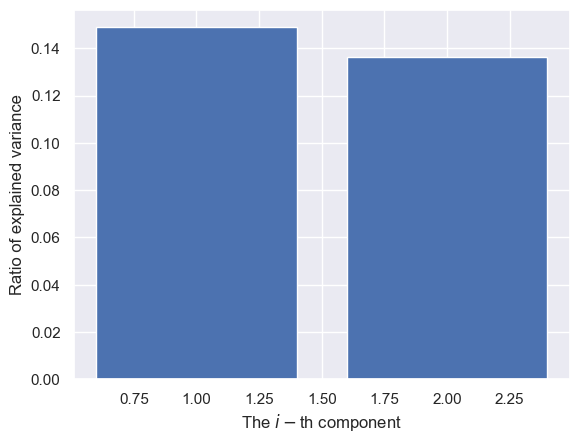

In [19]:
################# Your answer for Question 3.2   #################

print(pca.explained_variance_ratio_)

plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('The $i-$th component')
plt.ylabel('Ratio of explained variance')
################# Complete the code above #################

### How to obtain eigen values and vectors from sklearn PCA

- Eigen values -- <code>your-PCA-model\.explained\_variance\_</code>

- Eigen vectors -- <code>your-PCA-model.components_ </code>

### Eigen vectors (Eigen digits)

Text(0.5, 0.98, 'The eigen vector of each component')

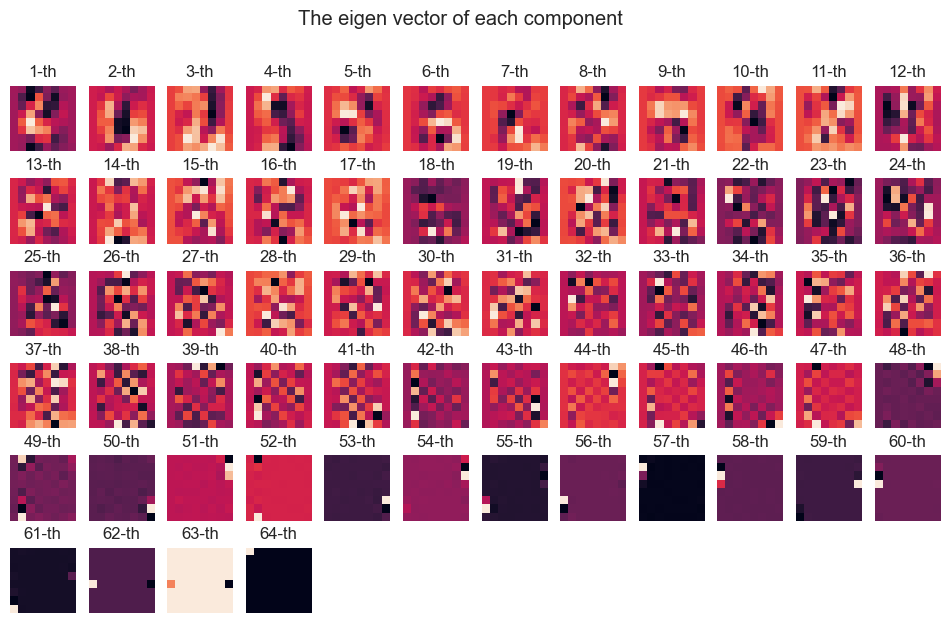

In [20]:
# Default # of components is the dimension of feature space 
pca = PCA()
pca.fit(data_digit.data)
h = 6
w = 12
fig, axes = plt.subplots(h, w)
fig.set_size_inches(12, 7)
for i in range(h):
    for j in range(w):
        idx = i * w + j
        if idx > 63:
            axes[i, j].axis('off')
        else:
            axes[i, j].imshow(pca.components_[idx].reshape(8, 8))
            axes[i, j].axis('off')
            axes[i, j].set_title(f'{idx + 1}-th')
fig.suptitle('The eigen vector of each component')

## Question 3.3 What are your observations from the visualized eigen vectors? (5 pts)

### Your solutions for Question 3.3:

### Feature reconstruction:

Suppose you only want to preserve $80\%$ variance after applying PCA for the dimension reduction, due to storage issues, etc. 

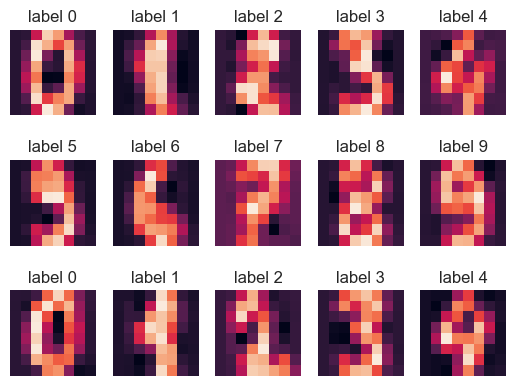

In [21]:
# Use pca from sklearn to fit on the feature space
pca_08 = PCA(0.8).fit(data_digit.data)

# Reconstruct 
lower_dimension = pca_08.fit_transform(data_digit.data)
reconstructed = pca_08.inverse_transform(lower_dimension)

# Display the reconstructed images (with a much lower dimension)
display_digits(reconstructed)

Assume now you are given only a set of perturbed images (with some random noise). As shown below, the figures become much more difficult to recognize.

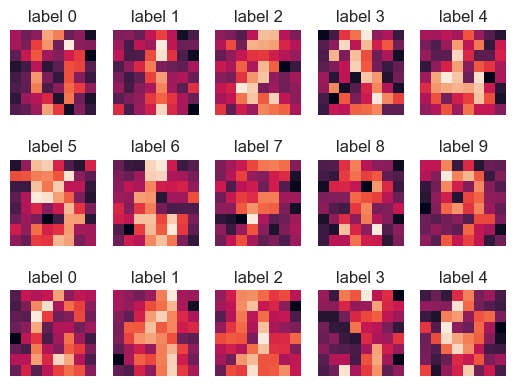

In [40]:
# Apply random noise on clean images
noisy_imgs = np.random.normal(data_digit.data, 5)
# Display the noisy images
display_digits(noisy_imgs)

## Question 3.4 Does PCA mitigate the random noise? (10 pts)

### Your tasks:

- Perform feature reconstruction on <code>noisy\_imgs</code> (preserving $80\%$ variance after applying PCA for the dimension reduction)

- Explain your understandings on why PCA reconstructs cleaner images.

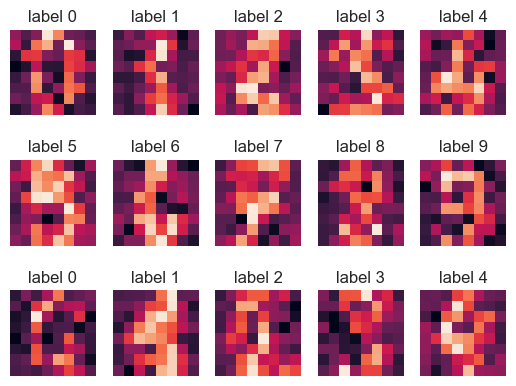

In [41]:
################# Your answer for Question 3.4   #################
pca_08 = PCA(0.8).fit(noisy_imgs.data)

# Reconstruct 
lower_dimension = pca_08.fit_transform(noisy_imgs.data)

# name the reconstructed images from noisy images as 'reconstructed_noise'
reconstructed_noise = pca_08.inverse_transform(lower_dimension)
# Display the reconstructed images
display_digits(reconstructed_noise) 
################# Complete the code above #################


### Your written answers for Question 3.4:
